## Research Assignment 6

#### Goal: Understand Dark Matter halo evolution for MW and M31 merger

In this code the focus will be to plot how the circular velocity for the halo of MW and M31 changes through the merger. 

Plan for aditional plot will be provided that shows the how ASAM (or spin paramater, if time allows) evolves during the merger.

#### Plot 1

plot halo circular velocity profile 

Position COM for MilkyWay is, [-2.07  2.95 -1.45] kpc
Velocity COM for MilkyWay is, [ 0.94  6.32 -1.35] km / s 

Position COM for MilkyWay is, [-377.66  611.43 -284.64] kpc
Velocity COM for MilkyWay is, [ 72.85 -72.14  49.  ] km / s 

Position COM for MilkyWay is, [-476.22  491.44 -412.4 ] kpc
Velocity COM for MilkyWay is, [ 44.42 101.78 142.23] km / s 

The seperation between MW and M31 is, 769.098 kpc
The relative velocity between MW and M31 is, 117.738 km / s
The seperation between M33 and M31 is, 201.083 kpc
The relative velocity between M33 and M31 is, 117.738 km / s
[ 0.25  1.75  3.25  4.75  6.25  7.75  9.25 10.75 12.25 13.75 15.25 16.75
 18.25 19.75 21.25 22.75 24.25 25.75 27.25 28.75 30.25]


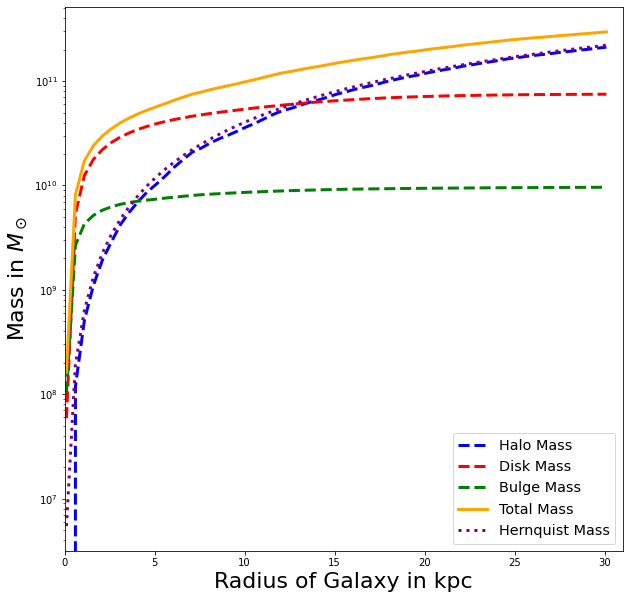

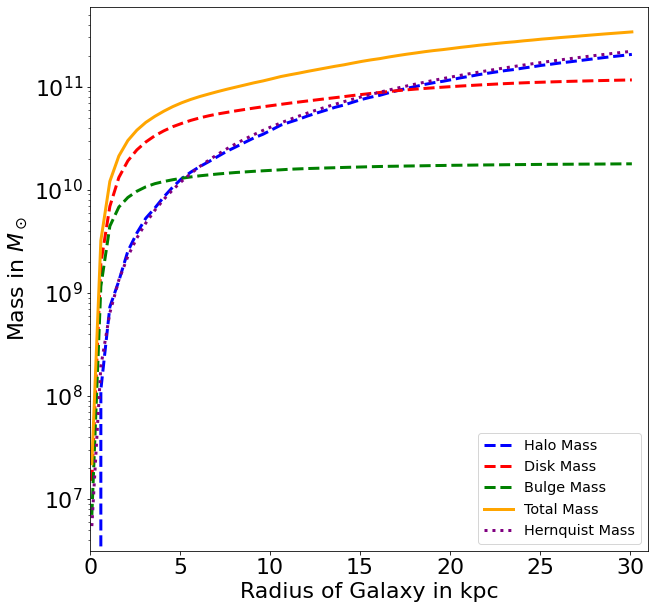

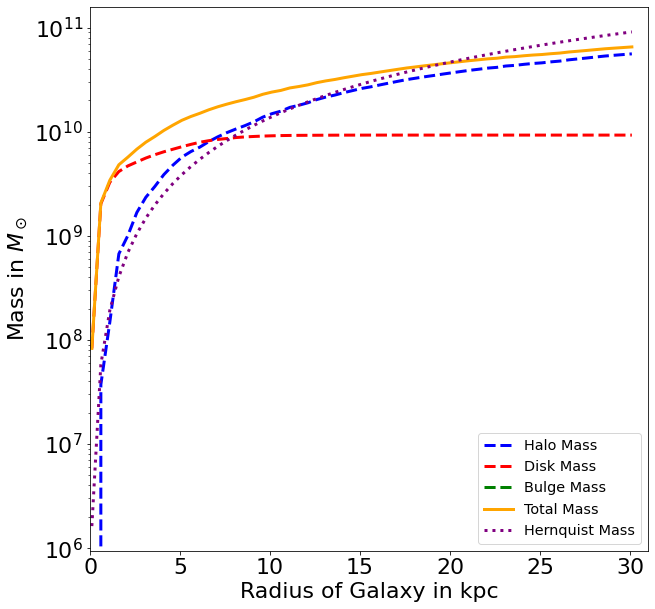

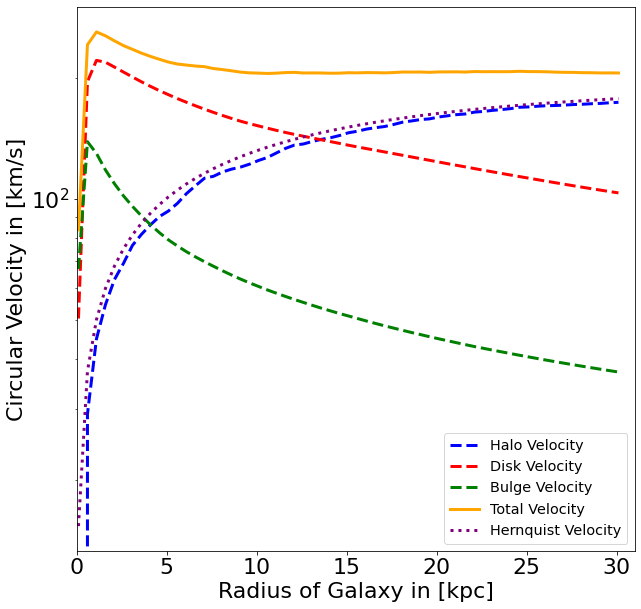

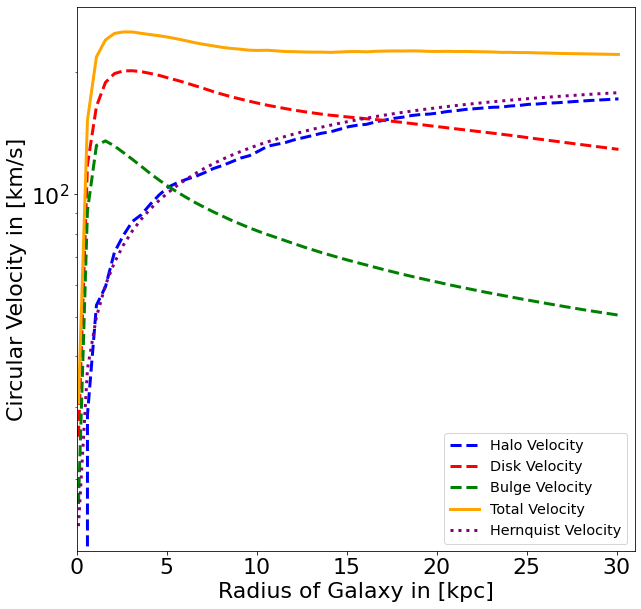

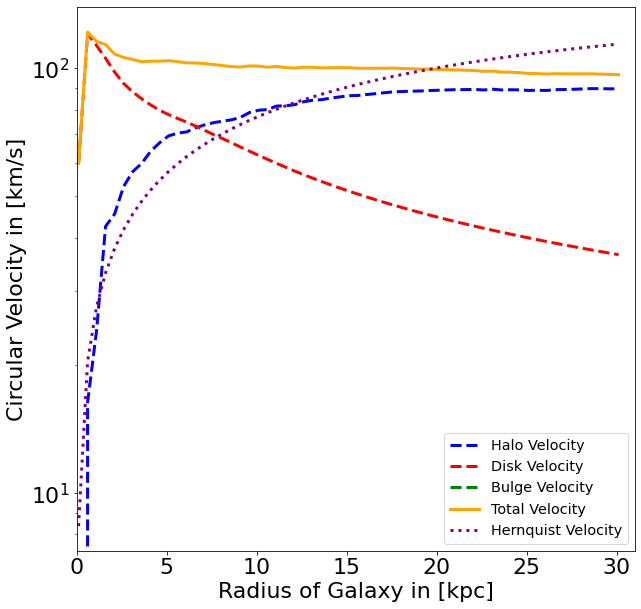

In [2]:
# import modules
import numpy as np
import astropy.units as u

import matplotlib
import matplotlib.pyplot as plt
import astropy.table as tbl

from ReadFile import Read
from CenterOfMass import CenterOfMass
from Mass_Profile import MassProfile

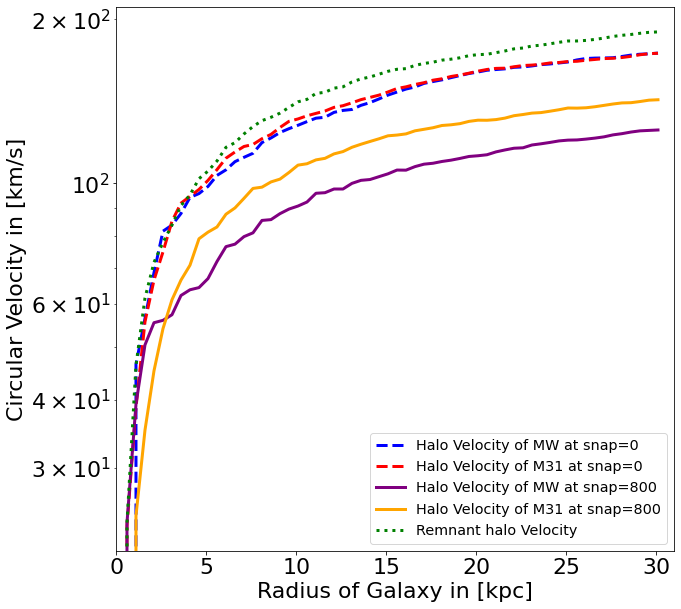

In [8]:
# Plot the Velocity Profile for MW

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

r = np.arange(0.1, 30.5, 0.5) 

MW = MassProfile("txtfiles/MW", 0) 
M31 = MassProfile("txtfiles/M31", 0)

MW_end = MassProfile("txtfiles/MW", 800) 
M31_end = MassProfile("txtfiles/M31", 800)

# plot MW halo velocity before merger
ax.semilogy(r, MW.CircularVelocity(1, r), color="blue", linestyle="--", 
            linewidth=3, label='Halo Velocity of MW at snap=0')
# plot M31 halo velocity before merger
ax.semilogy(r, M31.CircularVelocity(1, r), color="red", linestyle="--",
            linewidth=3, label='Halo Velocity of M31 at snap=0')
# plot MW halo velocity after merger
ax.semilogy(r, MW_end.CircularVelocity(1, r), color="purple",
            linewidth=3, label='Halo Velocity of MW at snap=800')
# plot M31 halo velocity after merger
ax.semilogy(r, M31_end.CircularVelocity(1, r), color="orange", 
            linewidth=3, label='Halo Velocity of M31 at snap=800')

total_circ_vel_remnant = np.sqrt(MW_end.CircularVelocity(1, r)**2 + M31_end.CircularVelocity(1, r)**2)
# plot hernquist velocity
ax.semilogy(r, total_circ_vel_remnant, color="green", 
            linestyle=":", linewidth=3, label='Remnant halo Velocity')

# Add labels
plt.xlabel('Radius of Galaxy in [kpc]', fontsize=22)
plt.ylabel(r'Circular Velocity in [km/s]', fontsize=22)

#set axis limits
plt.xlim(0,31)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#### Plot 2
Average Specific Angular Momentim (ASAM) of galaxy halo

In [9]:
class ASAM:

    def __init__(self, galaxy, snap):
        """ Class to compute average specific angular momentum of a 
        galaxy at given snapshot
        
        PARAMETERS
        ----------
        galaxy : `str: "MW", "M31" or "M33"`
            galaxy name 
        snap : `int: 0, 1, etc.`
            snapshot number
        """
        # add a string of the filenumber to the alue "000"
        ilbl = '000' + str(snap)
        # remove all but last 3 digits
        ilbl = ilbl[-3:]
        self.filename = "%s_"%(galaxy) + ilbl + '.txt'
        
        # read data in the given file using Read
        self.time, self.total, self.data = Read(self.filename)                                                                                             

        # store the mass, positions, and velocities of all the particles 
        self.m = self.data['m']

        self.x = (self.data['x']) * u.kpc
        self.y = (self.data['y']) * u.kpc
        self.z = (self.data['z']) * u.kpc
        
        self.vx = self.data['vx'][self.index]
        self.vy = self.data['vy'][self.index]
        self.vz = self.data['vz'][self.index]
        
        # store galaxy name as global property
        self.gname = galaxy

    def SpecAngularMomentum (self, ptype):
        """ This function computes the specific angular momentum of given 
        particle type in a galaxy.
        
        INPUTS:
        -------
        ptype: `int: 1, 2, 3`
            represents particle typr for the galaxy (halo, disk, bulge)
       
        OUTPUTS:
        --------
        SAM : `numpy array`
            specific angular momtem for all particles of ptype

        """
        # compute array of 'r' for all particles
        # r = sqrt(x^2+y^2+z^2)
        
        
        # compute array of 'v' for all particles
        # v = sqrt(vx^2+vy^2+vz^2)
        
        
        # use formula h = r x v, to find specific angular momentum of each particle
        
        # SAM is a vector
        return #SAM
    
    def AvgSpecAngularMomentum (self, ptype):
        """ This function computes the specific angular momentum of given 
        particle type in a galaxy.
        
        INPUTS:
        -------
        ptype: `int: 1, 2, 3`
            represents particle typr for the galaxy (halo, disk, bulge)
       
        OUTPUTS:
        --------
        ASAM : `array`
            specific angular momtem for all particles of ptype

        """
        # find the magnitude of SAM vector
        # |h| = sqrt(hx^2+hy^2+hz^2)
        
        
        # compute average of all SAM magnitudes
        
        
        return #ASAM
        

In [ ]:
# Average Specific Angular Momentum of MW before merger
MW_AM = ASAM("txtfiles/MW", 0)
MW_AM.AvgSpecAngularMomentum(1)

In [ ]:
# Average Specific Angular Momentum of MW before merger
M31_AM = ASAM("txtfiles/M31", 0)
M31_AM.AvgSpecAngularMomentum(1)

In [ ]:
# Average Specific Angular Momentum of Remnant
# Compute average of MW_AM.AvgSpecAngularMomentum(800) and M31_AM.AvgSpecAngularMomentum(800)
